In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

import pathlib
import os
import sys

# for selection the right path
import os,sys,inspect,pathlib
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.model_trainer_reg import *

from GD.LinearRegression import LinearRegression
from KNN.KNNRegressor import KNNRegressor

In [18]:
# Custom functions

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

#https://joeganser.github.io/2019-01-26-superconductivity-regression/

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Superconductivty', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/

In [29]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    return plt

In [19]:
datapath = get_data_path("Superconduct", "train.csv")
display(datapath)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Datasets/Superconduct/train.csv')

In [20]:
df_raw = pd.read_csv(datapath)

df_raw

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [21]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

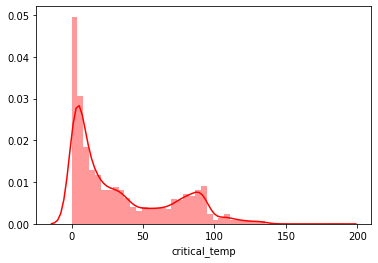

In [22]:
np.mean(df_raw["critical_temp"])
sns.distplot(df_raw["critical_temp"], color="red")

(0.0, 200.0)

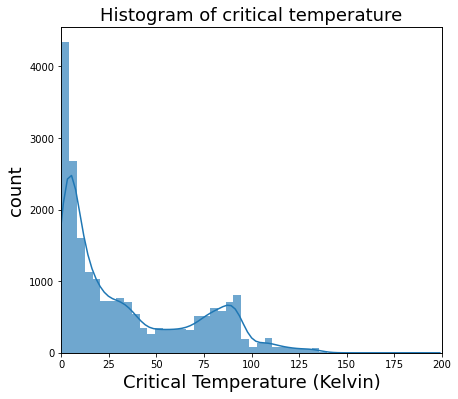

In [23]:
y = df_raw['critical_temp']
e=0.1515151515151516
y_mean = y.apply(lambda x: (x**e)).mean()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Histogram of critical temperature',fontsize=18)
ax1 = sns.distplot(y, kde=False)
# Creating another Y axis
second_ax1 = ax1.twinx()
#Plotting kde without hist on the second Y axis
sns.distplot(y, ax=second_ax1, kde=True, hist=True)
#Removing Y ticks from the second axis
second_ax1.set_yticks([])
ax1.set_ylabel('count',fontsize=18)
ax1.set_xlabel('Critical Temperature (Kelvin)',fontsize=18)
plt.xlim(0,200)

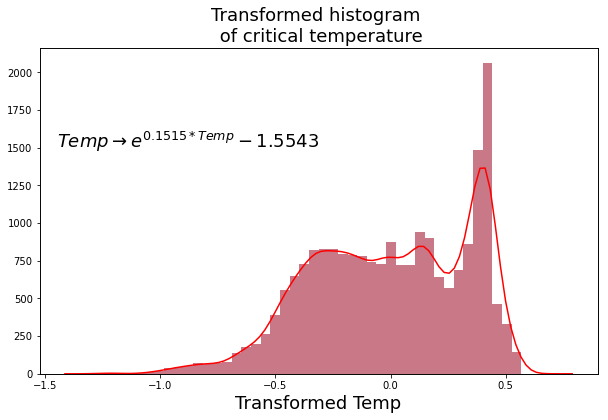

In [24]:
plt.figure(figsize=(10,6))
plt.title('Transformed histogram \n of critical temperature',fontsize=18)
transform_text = r'$Temp\rightarrow e^{0.1515*Temp}-1.5543$'
transformed = y.apply(lambda x: (x**e)-y_mean)
ax2 = sns.distplot(transformed, kde=False)
# Creating another Y axis
second_ax2 = ax2.twinx()
#Plotting kde without hist on the second Y axis
sns.distplot(transformed, ax=second_ax2, kde=True, hist=True,color='red')
#Removing Y ticks from the second axis
second_ax2.set_yticks([])
ax2.text(-1.45,1500,transform_text,fontsize=18)
ax2.set_xlabel('Transformed Temp',fontsize=18)
plt.subplots_adjust(wspace=0.2)
#plt.savefig('images/Critical_temp_hist.png')
plt.show()

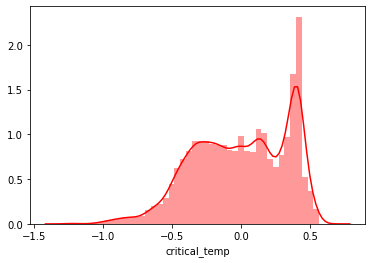

In [25]:
sns.distplot(transformed, color="red")

# Train and Test

In [26]:
Y = df_raw.critical_temp
#Y = transformed
X = df_raw.drop("critical_temp", axis = 1)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## SGD-Regression

In [27]:
MODEL = SGDRegressor
NAME = "SGD"
PATH = "out/"+NAME+"/"
params = {"alpha" : [0.0001]}

modeltrainer = ModelTrainer(MODEL, params, X, Y, f_eval=r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.3)
#modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)

Finished evaluation
R2_score= 0.7215743804251646
Total evaluation time = 0.71s


,alpha,train_time,inference_time,R2_score,RMSE
0,0.0001,0.46444,0.000923,0.721574,323.167398


Finished evaluation
R2_score= 0.44603686996465675
Total evaluation time = 0.72s


,alpha,train_time,inference_time,R2_score,RMSE
0,0.0001,0.543261,0.000742,0.446037,251.595057


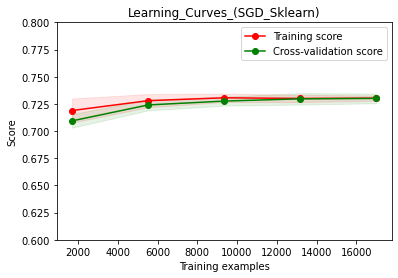

In [32]:
plt.figure()
plt.grid()

title = "Learning_Curves_(SGD_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.6, 0.8), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

In [34]:
MODEL = LinearRegression
params = {"alpha" : [0.00001], "max_iter": [1000,10000], "weigths": ["residual"]}

modeltrainer = ModelTrainer(MODEL, params, X, Y, f_eval=r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.3)
#modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)

Finished evaluation
R2_score= 0.3229380186933768
Total evaluation time = 8.76s


,alpha,max_iter,weigths,train_time,inference_time,R2_score,RMSE
0,0.00001,1000,residual,4.392754,0.322687,0.322938,785.862878
1,0.00001,10000,residual,8.159996,0.221077,0.322938,785.862878


Finished evaluation
R2_score= -0.39072058777482477
Total evaluation time = 8.53s


,alpha,max_iter,weigths,train_time,inference_time,R2_score,RMSE
0,0.00001,1000,residual,5.003538,0.235996,-0.390721,631.627641
1,0.00001,10000,residual,8.051672,0.143823,-0.390721,631.627641


## KNN-Regression

In [35]:
MODEL = KNeighborsRegressor
params = {"weights" : ["uniform"]}
NAME = "KNN"
PATH = "out/"+NAME+"/"

modeltrainer = ModelTrainer(MODEL, params, X, Y, f_eval=r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.3)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)

Finished evaluation
R2_score= 0.8958473239548856
Total evaluation time = 3.11s


,weights,train_time,inference_time,R2_score,RMSE
0,uniform,0.149156,2.736223,0.895847,120.889555


Finished evaluation
R2_score= 0.5553952906848421
Total evaluation time = 3.55s


,weights,train_time,inference_time,R2_score,RMSE
0,uniform,0.186611,3.148651,0.555395,201.927423


In [ ]:
MODEL = KNNRegressor
params = {"weights" : ["uniform"]}

modeltrainer = ModelTrainer(MODEL, params, X, np.array(Y.T), f_eval=r2_score)
########### train with TrainTestSplit  ###################
#modeltrainer.TTSplit(perc = 0.3)
modeltrainer.train()
modeltrainer.result

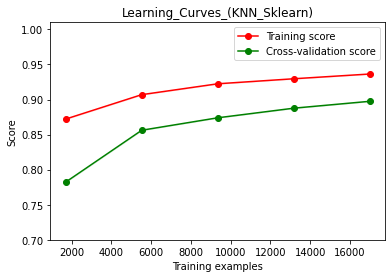

In [37]:
plt.figure()
plt.grid()

title = "Learning_Curves_(KNN_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = KNeighborsRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

## RF-Regression

In [38]:
MODEL = RandomForestRegressor
params = {"n_estimators" : [100]}
NAME = "RF"
PATH = "out/"+NAME+"/"

modeltrainer = ModelTrainer(MODEL, params, X, Y, f_eval=r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.3)
#modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)

Finished evaluation
R2_score= 0.9196311649991327
Total evaluation time = 68.93s


,n_estimators,train_time,inference_time,R2_score,RMSE
0,100,68.495566,0.185971,0.919631,93.283755


Finished evaluation
R2_score= 0.6756763699004202
Total evaluation time = 98.20s


,n_estimators,train_time,inference_time,R2_score,RMSE
0,100,97.875671,0.073234,0.675676,147.299013


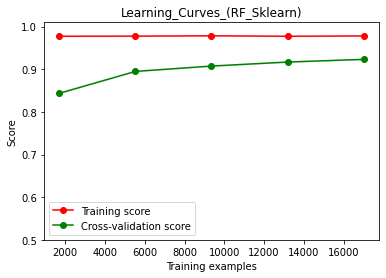

In [39]:
plt.figure()
plt.grid()

title = "Learning_Curves_(RF_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

## DT-Regression

In [40]:
MODEL = DecisionTreeRegressor
params = {"criterion": ["mse"]}
NAME = "DT"
PATH = "out/"+NAME+"/"

modeltrainer = ModelTrainer(MODEL, params, X, Y, f_eval=r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.3)
#modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)

Finished evaluation
R2_score= 0.8674480486436056
Total evaluation time = 1.73s


,criterion,train_time,inference_time,R2_score,RMSE
0,mse,1.39285,0.00407,0.867448,153.85247


Finished evaluation
R2_score= 0.4245355059102648
Total evaluation time = 1.92s


,criterion,train_time,inference_time,R2_score,RMSE
0,mse,1.605329,0.001595,0.424536,261.360394


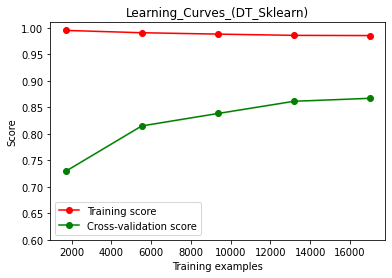

In [41]:
plt.figure()
plt.grid()

title = "Learning_Curves_(DT_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = DecisionTreeRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()